# OS-YCB Visualization

## 1. Generate Data

In [115]:
# not supported in this version of project saturn

0

## 2. Load Data

load standard libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

get tf-record parser

In [2]:
def _osycb_parse_single(example_proto):
    features = {
        "image/left/encoded": tf.io.FixedLenFeature([], tf.string),
        "image/right/encoded": tf.io.FixedLenFeature([], tf.string),
        "image/height": tf.io.FixedLenFeature([], tf.int64),
        "image/width": tf.io.FixedLenFeature([], tf.int64),
        "image/left/filename": tf.io.FixedLenFeature([], tf.string),
        "image/right/filename": tf.io.FixedLenFeature([], tf.string),
        "image/class/label": tf.io.FixedLenFeature([], tf.int64),
        "image/class/text": tf.io.FixedLenFeature([], tf.string),
        "image/class/occ1_label": tf.io.FixedLenFeature([], tf.int64),
        "image/class/occ1_text": tf.io.FixedLenFeature([], tf.string),
        "image/class/occ2_label": tf.io.FixedLenFeature([], tf.int64),
        "image/class/occ2_text": tf.io.FixedLenFeature([], tf.string),
        "image/class/occ3_label": tf.io.FixedLenFeature([], tf.int64),
        "image/class/occ3_text": tf.io.FixedLenFeature([], tf.string),
    }

    parsed_features = tf.io.parse_single_example(example_proto, features)
    one_hot = tf.one_hot(parsed_features["image/class/label"], 80)

    occ1_one_hot = tf.one_hot(parsed_features["image/class/occ1_label"], 80)
    occ2_one_hot = tf.one_hot(parsed_features["image/class/occ2_label"], 80)
    occ3_one_hot = tf.one_hot(parsed_features["image/class/occ3_label"], 80)
    n_hot = one_hot + occ1_one_hot + occ2_one_hot + occ3_one_hot

    image_encoded_l = parsed_features["image/left/encoded"]
    image_encoded_r = parsed_features["image/right/encoded"]

    image_decoded_l = tf.cast(
        tf.image.decode_jpeg(image_encoded_l, channels=3), tf.float32)
    image_decoded_r = tf.cast(
        tf.image.decode_jpeg(image_encoded_r, channels=3), tf.float32)

    return image_decoded_l, image_decoded_r, n_hot, one_hot

use parser to get to data

In [3]:
ds = tf.data.TFRecordDataset('/home/aecgroup/aecdata/Textures/occluded/datasets/osycb/tfrecord_files/2occ/20p/ds4/train/train50ds4-00000-of-00010.tfrecord')


ds = ds.map(_osycb_parse_single)
ds = ds.batch(100, drop_remainder=True)
iterator = ds.make_initializable_iterator()

W0205 12:17:00.251800 140584591865600 deprecation.py:323] From <ipython-input-3-b23d73fa76c2>:6: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [4]:
sess = tf.Session()
sess.run(iterator.initializer)

## 3. Visualize Data

loop through data and use matplotlib to show its contents

In [5]:
next_step = iterator.get_next()
print(len(next_step))

4


In [6]:
batch = sess.run(iterator.get_next())

In [34]:
left_im = np.asarray(batch[0][0, 14:46, 24:56, :], dtype=int)
right_im = np.asarray(batch[1][0, 14:46, 24:56, :], dtype=int)

In [35]:
left_im.shape

(32, 32, 3)

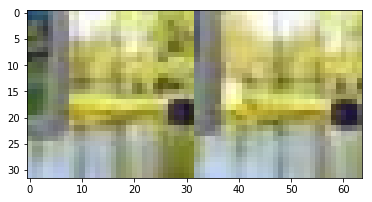

In [36]:
plt.imshow(np.concatenate([left_im, right_im], axis=1))

In [39]:
batch[0][0:10, 14:46, 24:56, :].shape

(10, 32, 32, 3)

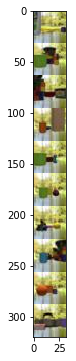

In [52]:
plt.imshow(np.reshape(np.asarray(batch[0][0:10, 14:46, 24:56, :], dtype=int), [320,32,3]))

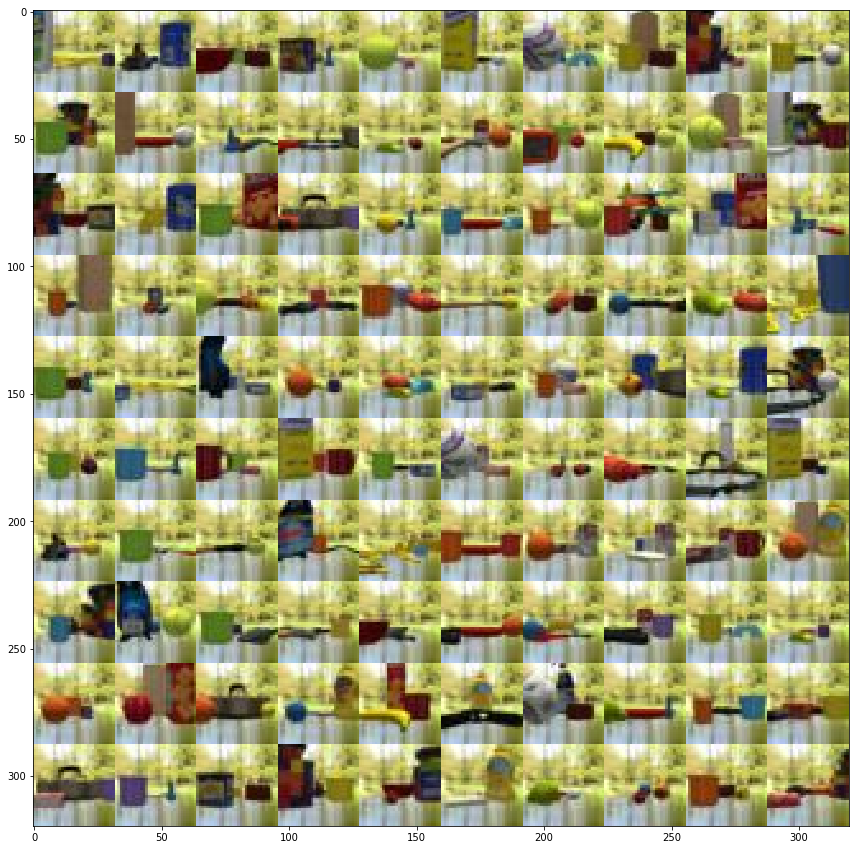

In [53]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 15]
plt.imshow(np.concatenate(
    [np.reshape(np.asarray(batch[0][0:10, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][10:20, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][20:30, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][30:40, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][40:50, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][50:60, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][60:70, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][70:80, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][80:90, 14:46, 24:56, :], dtype=int), [320,32,3]),
     np.reshape(np.asarray(batch[0][90:100, 14:46, 24:56, :], dtype=int), [320,32,3])
    ], axis=1))
mpl.rcParams['figure.figsize'] = [6, 6]